In [1]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Kentucky counties impacted by Helene (major disaster declaration)
county_names = [
    "Anderson", "Bath", "Bell", "Bourbon", "Bracken", "Breathitt",
    "Carter", "Clark", "Clay", "Elliott", "Estill", "Fleming",
    "Greenup", "Harlan", "Harrison", "Jackson", "Johnson",
    "Lawrence", "Lee", "Letcher", "Lewis", "Magoffin", "Menifee",
    "Montgomery", "Morgan", "Nicholas", "Owsley", "Powell",
    "Robertson", "Rockcastle", "Rowan", "Washington", "Wolfe"
]

# Load Kentucky counties and filter via state FIPS '21'
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '21')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()
hull_polygon = shape(geometry.convexHull().getInfo())

years = range(2024, 2014, -1)
all_data = []

for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-09-25') \
        .filterBounds(geometry) \
        .select('sm_rootzone')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_rootzone': f['properties'].get('sm_rootzone')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_rootzone_ky_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_rootzone_ky_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 322 points for 2024
Processing 2023...
Collected 322 points for 2023
Processing 2022...
Collected 322 points for 2022
Processing 2021...
Collected 322 points for 2021
Processing 2020...
Collected 322 points for 2020
Processing 2019...
Collected 322 points for 2019
Processing 2018...
Collected 322 points for 2018
Processing 2017...
Collected 322 points for 2017
Processing 2016...
Collected 322 points for 2016
Processing 2015...
Collected 322 points for 2015
Saved to smap_soil_moisture_rootzone_ky_2015_2024_before.csv


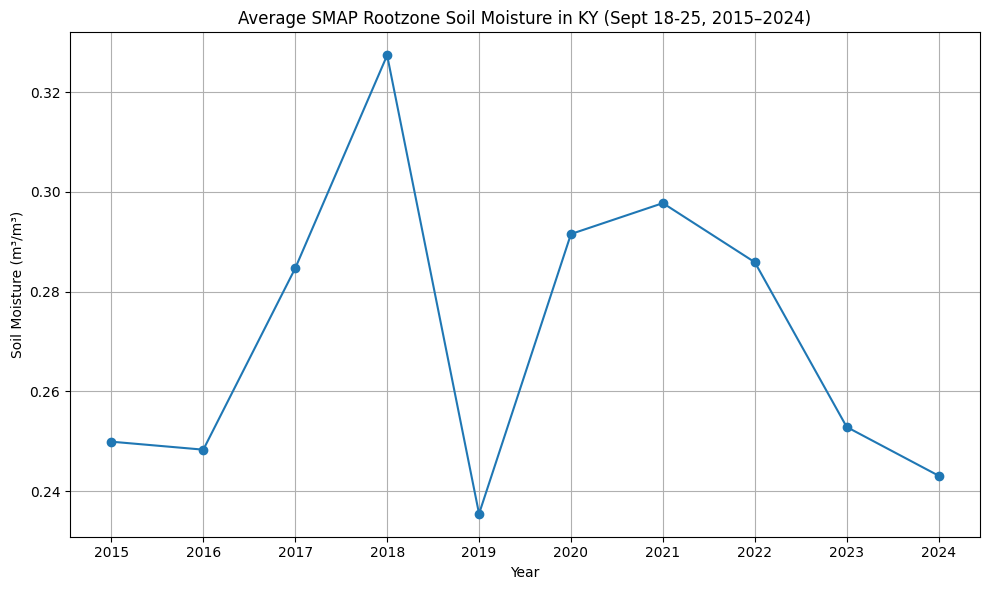

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_rootzone_ky_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_rootzone'], marker='o', linestyle='-')
plt.title('Average SMAP Rootzone Soil Moisture in KY (Sept 18-25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [3]:
import ee
import pandas as pd
from shapely.geometry import Point, shape

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize()

# Kentucky counties impacted by Helene (major disaster declaration)
county_names = [
    "Anderson", "Bath", "Bell", "Bourbon", "Bracken", "Breathitt",
    "Carter", "Clark", "Clay", "Elliott", "Estill", "Fleming",
    "Greenup", "Harlan", "Harrison", "Jackson", "Johnson",
    "Lawrence", "Lee", "Letcher", "Lewis", "Magoffin", "Menifee",
    "Montgomery", "Morgan", "Nicholas", "Owsley", "Powell",
    "Robertson", "Rockcastle", "Rowan", "Washington", "Wolfe"
]

# Load Kentucky counties and filter via state FIPS '21'
counties = ee.FeatureCollection('TIGER/2016/Counties') \
    .filter(ee.Filter.eq('STATEFP', '21')) \
    .filter(ee.Filter.inList('NAME', county_names))

geometry = counties.geometry()
hull_polygon = shape(geometry.convexHull().getInfo())

years = range(2024, 2014, -1)
all_data = []

for year in years:
    print(f"Processing {year}...")
    smap = ee.ImageCollection('NASA/SMAP/SPL4SMGP/007') \
        .filterDate(f'{year}-09-18', f'{year}-09-25') \
        .filterBounds(geometry) \
        .select('sm_surface')

    if smap.size().getInfo() == 0:
        print(f"No data for {year}")
        continue

    image = smap.mean().clip(geometry)
    samples = image.sample(region=geometry, scale=10000, numPixels=5000, geometries=True)
    features = samples.getInfo()['features']

    year_data = []
    for f in features:
        lon, lat = f['geometry']['coordinates']
        if hull_polygon.contains(Point(lon, lat)):
            year_data.append({
                'year': year,
                'latitude': lat,
                'longitude': lon,
                'sm_surface': f['properties'].get('sm_surface')
            })

    if year_data:
        all_data.extend(year_data)
        print(f"Collected {len(year_data)} points for {year}")

if all_data:
    df = pd.DataFrame(all_data).sort_values('year')
    df.to_csv("smap_soil_moisture_surface_ky_2015_2024_before.csv", index=False)
    print("Saved to smap_soil_moisture_surface_ky_2015_2024_before.csv")
else:
    print("No data collected.")

Processing 2024...
Collected 322 points for 2024
Processing 2023...
Collected 322 points for 2023
Processing 2022...
Collected 322 points for 2022
Processing 2021...
Collected 322 points for 2021
Processing 2020...
Collected 322 points for 2020
Processing 2019...
Collected 322 points for 2019
Processing 2018...
Collected 322 points for 2018
Processing 2017...
Collected 322 points for 2017
Processing 2016...
Collected 322 points for 2016
Processing 2015...
Collected 322 points for 2015
Saved to smap_soil_moisture_surface_ky_2015_2024_before.csv


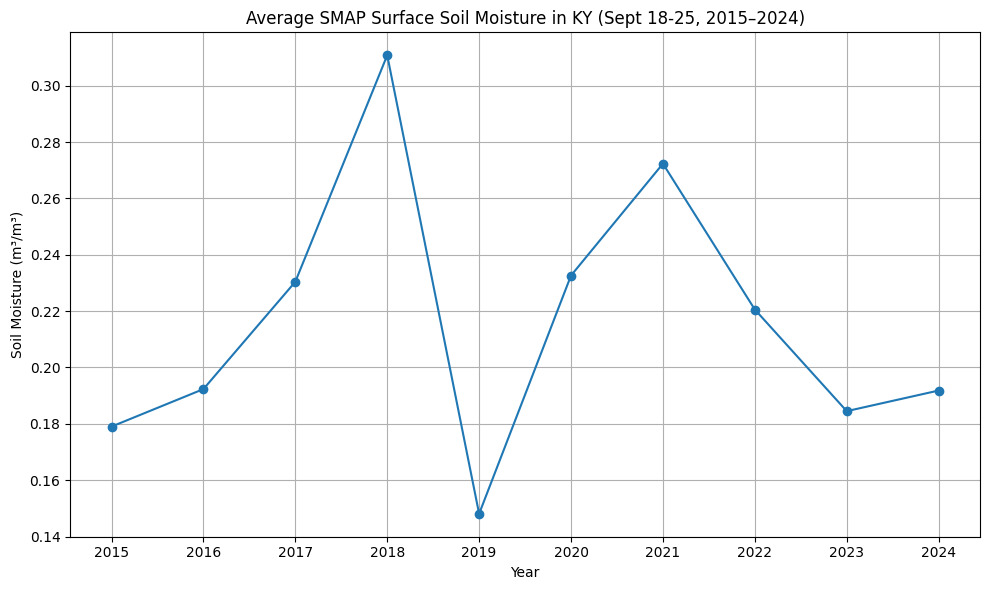

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df = pd.read_csv('smap_soil_moisture_surface_ky_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg = df.groupby('year')['sm_surface'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['sm_surface'], marker='o', linestyle='-')
plt.title('Average SMAP Surface Soil Moisture in KY (Sept 18-25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.grid(True)
plt.xticks(yearly_avg['year'])  # Ensure all years show on the x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

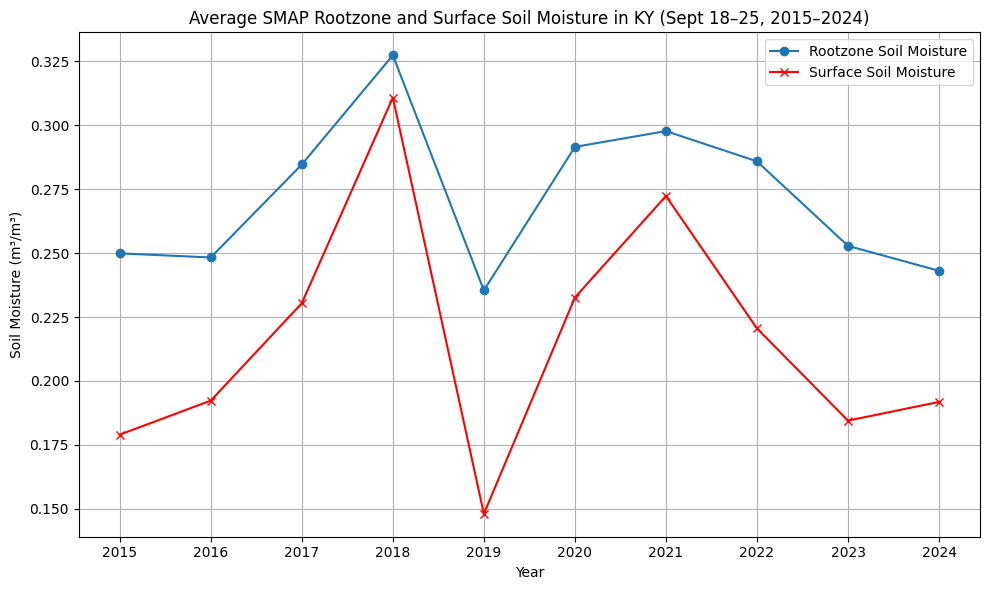

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined CSV
df1 = pd.read_csv('smap_soil_moisture_rootzone_ky_2015_2024_before.csv')

# Group by year and calculate the mean soil moisture
yearly_avg1 = df1.groupby('year')['sm_rootzone'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Rootzone plot
plt.plot(
    yearly_avg1['year'],
    yearly_avg1['sm_rootzone'],
    marker='o',
    linestyle='-',
    label='Rootzone Soil Moisture'
)

# Surface plot (assuming 'yearly_avg' and 'sm_surface' are already defined elsewhere)
plt.plot(
    yearly_avg['year'],
    yearly_avg['sm_surface'],
    marker='x',
    linestyle='-',
    color='r',
    label='Surface Soil Moisture'
)

# Add title and labels
plt.title('Average SMAP Rootzone and Surface Soil Moisture in KY (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.legend()  # Now the legend will show the two lines
plt.grid(True)
plt.xticks(yearly_avg1['year'])  # Show each year on x-axis
plt.tight_layout()
plt.savefig('soil_moisture_trend.png')  # Optional: save the plot
plt.show()

In [6]:
import pandas as pd
from scipy import stats

# Load both datasets
df_root = pd.read_csv("smap_soil_moisture_rootzone_ky_2015_2024_before.csv")
df_surface = pd.read_csv("smap_soil_moisture_surface_ky_2015_2024_before.csv")

# Compute yearly means
root_yearly = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
surface_yearly = df_surface.groupby('year')['sm_surface'].mean().reset_index()

# --- Rootzone Analysis ---
past_root = root_yearly[root_yearly['year'] < 2024]
val_root_2024 = root_yearly[root_yearly['year'] == 2024]['sm_rootzone'].values[0]
mean_root_10yr = past_root['sm_rootzone'].mean()
t_root, p_root = stats.ttest_1samp(past_root['sm_rootzone'], val_root_2024)

# --- Surface Analysis ---
past_surface = surface_yearly[surface_yearly['year'] < 2024]
val_surface_2024 = surface_yearly[surface_yearly['year'] == 2024]['sm_surface'].values[0]
mean_surface_10yr = past_surface['sm_surface'].mean()
t_surface, p_surface = stats.ttest_1samp(past_surface['sm_surface'], val_surface_2024)

# --- Results ---
print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"T-statistic: {t_root:.3f}, P-value: {p_root:.4f}")
if p_root < 0.05 and val_root_2024 < mean_root_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")

print("\n🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"T-statistic: {t_surface:.3f}, P-value: {p_surface:.4f}")
if p_surface < 0.05 and val_surface_2024 < mean_surface_10yr:
    print("✅ 2024 is significantly lower (p < 0.05).")
else:
    print("❌ 2024 is NOT significantly lower.")


🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2749
2024 Avg: 0.2431
T-statistic: 3.190, P-value: 0.0128
✅ 2024 is significantly lower (p < 0.05).

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2190
2024 Avg: 0.1918
T-statistic: 1.624, P-value: 0.1431
❌ 2024 is NOT significantly lower.


In [7]:
# --- Given updated data ---
mean_root_10yr = 0.2749
val_root_2024 = 0.2431

mean_surface_10yr = 0.2190
val_surface_2024 = 0.1918

# --- Percent decrease calculations ---
percent_diff_root = ((mean_root_10yr - val_root_2024) / mean_root_10yr) * 100
percent_diff_surface = ((mean_surface_10yr - val_surface_2024) / mean_surface_10yr) * 100

# --- Print results ---
print("📉 Percent Decrease in Soil Moisture (2024 vs. 10-Year Avg)\n")

print("🟫 ROOTZONE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_root_10yr:.4f}")
print(f"2024 Avg: {val_root_2024:.4f}")
print(f"Percent Decrease: {percent_diff_root:.2f}%")
print("✅ 2024 is significantly lower (p < 0.05).\n")

print("🟥 SURFACE SOIL MOISTURE")
print(f"10-Year Avg (2015–2023): {mean_surface_10yr:.4f}")
print(f"2024 Avg: {val_surface_2024:.4f}")
print(f"Percent Decrease: {percent_diff_surface:.2f}%")
print("❌ 2024 is NOT significantly lower.")


📉 Percent Decrease in Soil Moisture (2024 vs. 10-Year Avg)

🟫 ROOTZONE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2749
2024 Avg: 0.2431
Percent Decrease: 11.57%
✅ 2024 is significantly lower (p < 0.05).

🟥 SURFACE SOIL MOISTURE
10-Year Avg (2015–2023): 0.2190
2024 Avg: 0.1918
Percent Decrease: 12.42%
❌ 2024 is NOT significantly lower.


/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/24870400.py:65: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/24870400.py:65: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/24870400.py:66: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_with_averages_only.png')
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/24870400.py:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_with_averages_only.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure

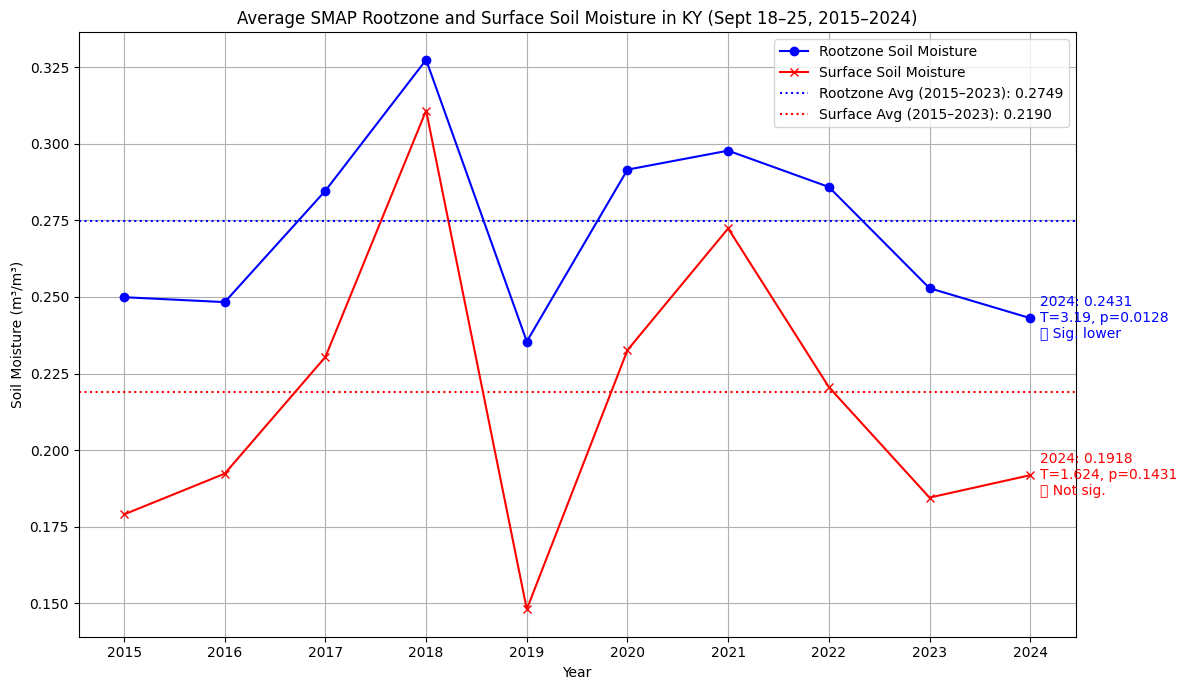

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load rootzone and surface CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_ky_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_ky_2015_2024_before.csv')

# Group by year and calculate mean soil moisture
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Known averages and statistical test results
rootzone_avg_2015_2023 = 0.2749
rootzone_2024 = 0.2431
rootzone_t = 3.190
rootzone_p = 0.0128

surface_avg_2015_2023 = 0.2190
surface_2024 = 0.1918
surface_t = 1.624
surface_p = 0.1431

# Plotting
plt.figure(figsize=(12, 7))

# Plot annual soil moisture values
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'], color = 'blue',
    marker='o', linestyle='-', label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', linestyle='-', color='red', label='Surface Soil Moisture'
)

# Plot 10-year average lines
plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':',
    label='Rootzone Avg (2015–2023): 0.2749'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':',
    label='Surface Avg (2015–2023): 0.2190'
)

# Annotate 2024 values and statistical results
plt.text(
    2024.1, rootzone_2024,
    f"2024: {rootzone_2024}\nT={rootzone_t}, p={rootzone_p}\n✅ Sig. lower",
    color='blue', va='center'
)
plt.text(
    2024.1, surface_2024,
    f"2024: {surface_2024}\nT={surface_t}, p={surface_p}\n❌ Not sig.",
    color='red', va='center'
)

# Final formatting
plt.title('Average SMAP Rootzone and Surface Soil Moisture in KY (Sept 18–25, 2015–2024)')
plt.xlabel('Year')
plt.ylabel('Soil Moisture (m³/m³)')
plt.xticks(yearly_avg_root['year'])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('soil_moisture_trend_with_averages_only.png')
plt.show()


/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/3362019681.py:66: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/3362019681.py:66: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/3362019681.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_with_averages_only.png')
/var/folders/zl/rltftr5d1p73n2c7r94qp6ph0000gn/T/ipykernel_46282/3362019681.py:67: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.savefig('soil_moisture_trend_with_averages_only.png')
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

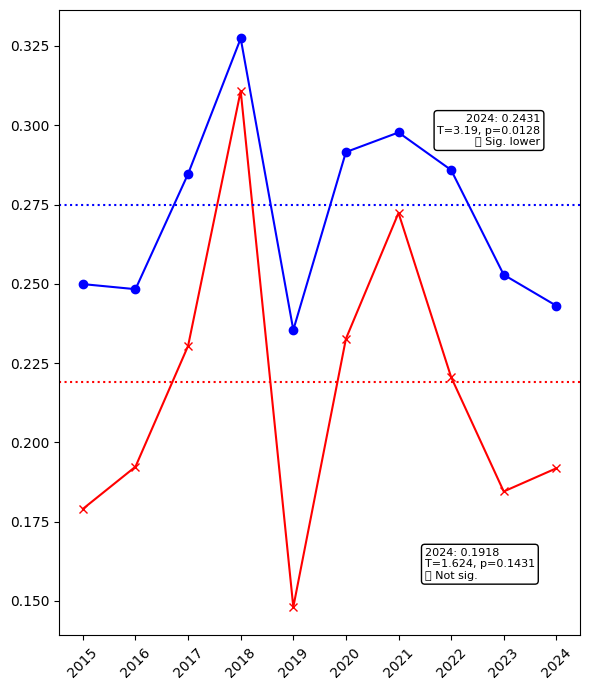

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load rootzone and surface CSVs
df_root = pd.read_csv('smap_soil_moisture_rootzone_ky_2015_2024_before.csv')
df_surf = pd.read_csv('smap_soil_moisture_surface_ky_2015_2024_before.csv')

# Group by year and calculate mean soil moisture
yearly_avg_root = df_root.groupby('year')['sm_rootzone'].mean().reset_index()
yearly_avg_surf = df_surf.groupby('year')['sm_surface'].mean().reset_index()

# Known averages and statistical test results
rootzone_avg_2015_2023 = 0.2749
rootzone_2024 = 0.2431
rootzone_t = 3.190
rootzone_p = 0.0128

surface_avg_2015_2023 = 0.2190
surface_2024 = 0.1918
surface_t = 1.624
surface_p = 0.1431

# Plotting with reduced width
plt.figure(figsize=(6, 7))  # ⬅️ Narrower figure

# Plot annual soil moisture values
plt.plot(
    yearly_avg_root['year'], yearly_avg_root['sm_rootzone'], color='blue',
    marker='o', linestyle='-', label='Rootzone Soil Moisture'
)
plt.plot(
    yearly_avg_surf['year'], yearly_avg_surf['sm_surface'],
    marker='x', linestyle='-', color='red', label='Surface Soil Moisture'
)

# Plot 10-year average lines
plt.axhline(
    y=rootzone_avg_2015_2023, color='blue', linestyle=':',
    label='Rootzone Avg (2015–2023): 0.2749'
)
plt.axhline(
    y=surface_avg_2015_2023, color='red', linestyle=':',
    label='Surface Avg (2015–2023): 0.2190'
)

plt.text(
    2023.7, rootzone_2024 + 0.05,  # moved higher by increasing Y value
    f"2024: {rootzone_2024}\nT={rootzone_t}, p={rootzone_p}\n✅ Sig. lower",
    color='black', va='bottom', ha='right', fontsize=8,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)


# Surface annotation (moved inside plot, lower)
plt.text(
    2021.5, surface_2024 - 0.025,
    f"2024: {surface_2024}\nT={surface_t}, p={surface_p}\n❌ Not sig.",
    color='black', va='top', ha='left', fontsize=8,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)


# Final formatting
plt.xticks(yearly_avg_root['year'], rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig('soil_moisture_trend_with_averages_only.png')
plt.show()
